# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models
print('TensorFlow version:', tf.__version__)

2025-07-02 10:26:25.932348: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 10:26:25.991750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 10:26:26.044453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751444786.093879    6160 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751444786.110452    6160 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751444786.210865    6160 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

TensorFlow version: 2.19.0


## Part 1 – MLP on Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/tmp/ipykernel_6160/1715040388.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [3]:
mlp = models.Sequential([layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

/home/amayas/Bureau/WorkSpace/Cours-Data-Science-M2/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-02 10:26:55.529238: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

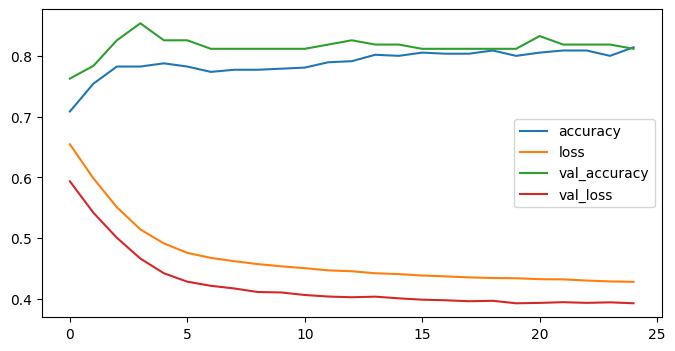

Test accuracy: 0.8044692873954773


In [4]:
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [5]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

/home/amayas/Bureau/WorkSpace/Cours-Data-Science-M2/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 12s - 29ms/step - accuracy: 0.9354 - loss: 0.2226 - val_accuracy: 0.9793 - val_loss: 0.0686
Epoch 2/5
422/422 - 11s - 26ms/step - accuracy: 0.9808 - loss: 0.0608 - val_accuracy: 0.9867 - val_loss: 0.0464
Epoch 3/5
422/422 - 11s - 26ms/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9888 - val_loss: 0.0431
Epoch 4/5
422/422 - 11s - 26ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 5/5
422/422 - 11s - 26ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9860 - val_loss: 0.0551
Test accuracy: 0.9883999824523926


## Part 3 – RNNs for Time Series

We'll forecast a sine wave using previous 50 time‑steps.

In [8]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [9]:
rnn = models.Sequential([layers.SimpleRNN(32, input_shape=(window,1)),
                        layers.Dense(1)])
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

/home/amayas/Bureau/WorkSpace/Cours-Data-Science-M2/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 2s - 38ms/step - loss: 0.0038 - val_loss: 2.0359e-04
Epoch 2/5
56/56 - 1s - 12ms/step - loss: 1.5213e-04 - val_loss: 9.3568e-05
Epoch 3/5
56/56 - 1s - 11ms/step - loss: 8.0996e-05 - val_loss: 6.1560e-05
Epoch 4/5
56/56 - 1s - 11ms/step - loss: 5.4905e-05 - val_loss: 4.5387e-05
Epoch 5/5
56/56 - 1s - 11ms/step - loss: 3.9412e-05 - val_loss: 3.6132e-05
RNN Test MSE: 3.261831807321869e-05


### LSTM

In [10]:
lstm = models.Sequential([layers.LSTM(64, input_shape=(window,1)),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 4s - 71ms/step - loss: 0.0478 - val_loss: 0.0032
Epoch 2/5
56/56 - 2s - 37ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/5
56/56 - 2s - 37ms/step - loss: 0.0011 - val_loss: 5.0373e-04
Epoch 4/5
56/56 - 2s - 37ms/step - loss: 2.1213e-04 - val_loss: 7.1958e-05
Epoch 5/5
56/56 - 2s - 32ms/step - loss: 4.5134e-05 - val_loss: 2.4441e-05
LSTM Test MSE: 2.614192089822609e-05


### GRU

In [11]:
gru = models.Sequential([layers.GRU(64, input_shape=(window,1)),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 4s - 78ms/step - loss: 0.0463 - val_loss: 5.1688e-04
Epoch 2/5
56/56 - 2s - 39ms/step - loss: 4.8369e-04 - val_loss: 3.9841e-04
Epoch 3/5
56/56 - 2s - 39ms/step - loss: 3.9232e-04 - val_loss: 3.6489e-04
Epoch 4/5
56/56 - 2s - 32ms/step - loss: 3.5650e-04 - val_loss: 3.4565e-04
Epoch 5/5
56/56 - 2s - 32ms/step - loss: 3.2475e-04 - val_loss: 3.0629e-04
GRU Test MSE: 0.000305167370242998


## Visualizing MNIST Data

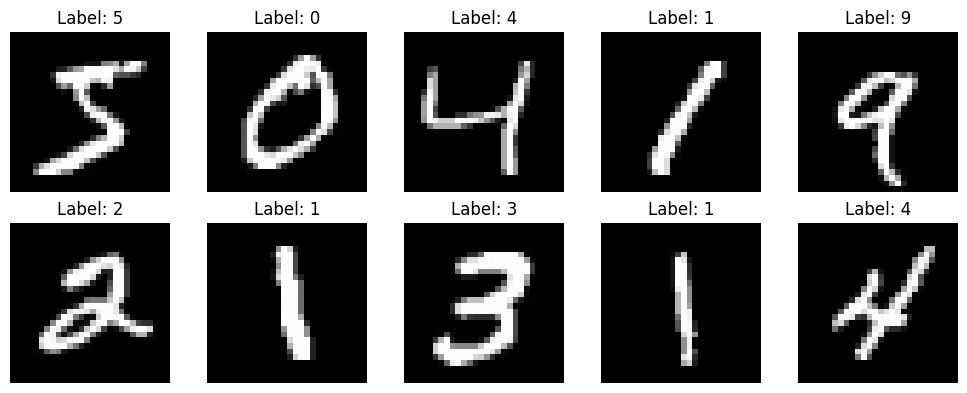

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
(X_train, y_train), (_, _) = mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Model Predictions

In [13]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    import numpy as np
    plt.figure(figsize=(15, 4))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"T: {true_labels[i]}, P: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32),
    LeakyReLU(negative_slope=0.1),   # Remplace relu
    Dense(16, activation='tanh'),    # Essaye aussi sigmoid ici
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [15]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),               # ← réduit le surapprentissage
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [16]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [17]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.3106 - loss: 1.8791 - val_accuracy: 0.5264 - val_loss: 1.3394
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.5204 - loss: 1.3530 - val_accuracy: 0.5940 - val_loss: 1.1615
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.5760 - loss: 1.2046 - val_accuracy: 0.6230 - val_loss: 1.0997
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.6136 - loss: 1.1011 - val_accuracy: 0.6538 - val_loss: 1.0052
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.6340 - loss: 1.0359 - val_accuracy: 0.6672 - val_loss: 0.9523
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6603 - loss: 0.9599 - val_accuracy: 0.6726 - val_loss: 0.9426
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.6692 - loss: 0.9285 - val_accuracy: 0.6886 - val_loss: 0.9019
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━

In [18]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Chargement et préparation
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Modèle
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


/home/amayas/Bureau/WorkSpace/Cours-Data-Science-M2/env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.6635 - loss: 0.5728 - val_accuracy: 0.8324 - val_loss: 0.3749
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8898 - loss: 0.2779 - val_accuracy: 0.8546 - val_loss: 0.3464
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9352 - loss: 0.1776 - val_accuracy: 0.8450 - val_loss: 0.4019
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9511 - loss: 0.1376 - val_accuracy: 0.8354 - val_loss: 0.4275
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9646 - loss: 0.1050 - val_accuracy: 0.8380 - val_loss: 0.5078


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(hist):
    pd.DataFrame(hist.history)[['loss', 'val_loss']].plot()
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()
